In [1]:
rasterfile = '/Users/WilliamHenryAshfieldIV/dat/iris/iris_l2_20141025_145828_3880106953_raster_t000_r00000.fits'
obsdir = '/Users/WilliamHenryAshfieldIV/dat/iris/20141025_145828_3880106953'

In [ ]:
#d = iris_getwindata(rasterfile,1403,wrange=[1400.,1405.])

In [ ]:
#slit_time = total(d.int[*,i_start:i_end,*],1)

In [ ]:
#utplot, d.time_ccsds[i_start:i_end], slit_time[*,69]/max(slit_time[*,69]), yr = [0,1.05],     ytit = 'Norm. DN/s'

In [84]:
import numpy as np
import iris_lmsalpy.hcr2fits as hcr2fits
import iris_lmsalpy.extract_irisL2data as extract_irisL2data
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as date

import astropy
import sunraster
import irispy.io as io

In [34]:
from sunpy.io.fits import read

In [3]:
#sp = extract_irisL2data.load(rasterfile)

In [4]:
#spec = io.read_iris_spectrograph_level2_fits()

In [5]:
#sp.raster['Si IV 1394'].data.shape

In [6]:
#hd = extract_irisL2data.getheader(rasterfile)

In [35]:
ttr = read(rasterfile)

# New Method:

In [3]:
from irisreader.data import sample_observation

In [4]:
obs = sample_observation()

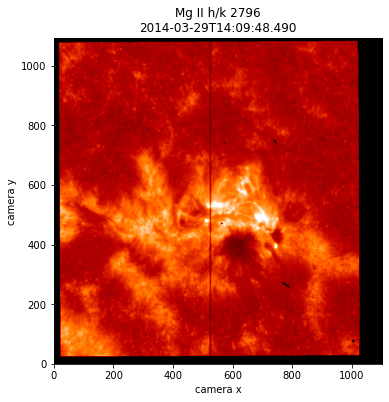

In [5]:
obs.sji("Mg II h/k").plot(0)

In [6]:
import irisreader as ir

In [7]:
ir.config

IRISreader configuration:
---------------------------
default_mirror: lmsal
goes_base_url: http://server1071.cs.technik.fhnw.ch/iris/goes/xrs/
hek_base_url: http://www.lmsal.com/hek/her
max_open_files: 256
mirrors: {'lmsal': 'http://www.lmsal.com/solarsoft/irisa/data/level2_compressed/', 'uio': 'http://sdc.uio.no/vol/fits/iris/level2/', 'fhnw': 'http://server0090.cs.technik.fhnw.ch/iris_compressed/'}
use_memmap: False
verbosity_level: 1

In [8]:
from irisreader import observation

In [9]:
obs = observation( obsdir )

In [10]:
print(obs)

Large sit-and-stare 0.3x120 1s  C II   Mg II h/k   Mg II w Deep x 4
2014-10-25 14:58:28 - 2014-10-25 18:00:52

SJI lines:
  field  wavelength description
0  FUV1      1330.0   C II 1330

raster lines:
  field  wavelength   description
0  FUV1      1335.7     C II 1336
1  FUV2      1393.8    Si IV 1394
2   NUV      2796.2  Mg II k 2796


In [11]:
obs.raster.get_lines()

,field,wavelength,description
0,FUV1,1335.7,C II 1336
1,FUV2,1393.8,Si IV 1394
2,NUV,2796.2,Mg II k 2796


In [12]:
lambda_min = 1401
lambda_max = 1405
n_breaks = 200
interpolated_image = obs.raster("Si IV 1394").get_interpolated_image_step( 1422, lambda_min, lambda_max, n_breaks=200, divide_by_exptime=True )

In [13]:
interpolated_image.shape

(387, 200)

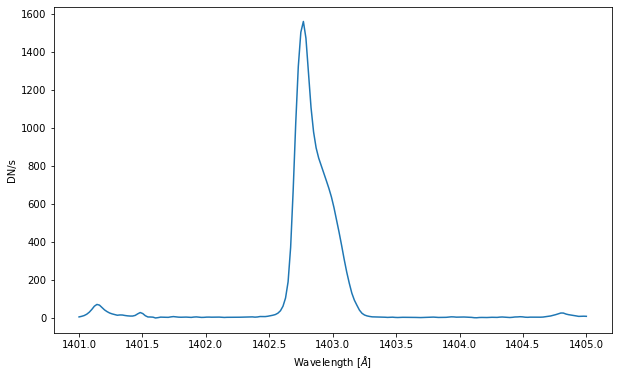

In [14]:
plt.xlabel( r'Wavelength [$\AA$]' )
plt.ylabel( "DN/s" )
plt.plot( np.linspace( lambda_min, lambda_max, n_breaks ), interpolated_image[69] )
plt.show()

In [15]:
sampdat = obs.raster("Si IV 1394").get_image_step(1422, divide_by_exptime=True)

In [16]:
sampdat.shape

(387, 1020)

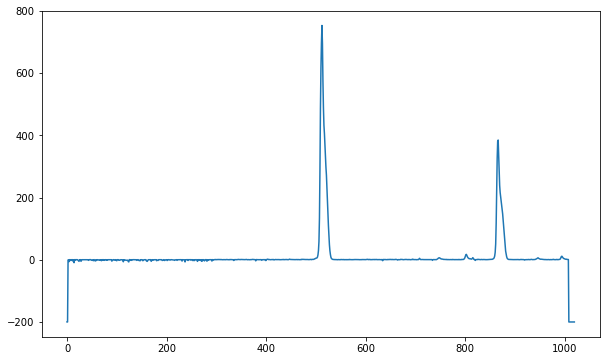

In [17]:
plt.plot(sampdat[69,:])

In [18]:
nt = len(obs.raster("Si IV 1394").time_specific_headers)

In [19]:
siiv=obs.raster('Si IV 1394')

# Process to create time array 
(to plot using pyplot.plot_date)

In [20]:
siiv.time_specific_headers[1]['TIME']

5.93

In [21]:
timet = np.zeros(nt)
for i in range(0,nt):
    timet[i] = siiv.time_specific_headers[i]['TIME']

In [23]:
siiv.start_date

'2014-10-25T14:58:28.560'

In [24]:
sttime = 53908 # in sec.
timet += sttime
rtimet = np.rint(timet)

In [55]:
dts = np.empty(len(rtimet), dtype = '<U15')
for i in range (0,nt):
    dts[i] = str(datetime.timedelta(seconds=rtimet[i]))

In [44]:
ty = np.arange(0,nt)

In [90]:
KK = np.array([datetime.datetime for x in range(nt)])
for i in range(0,nt):
    KK[i]=datetime.datetime.strptime(dts[i],'%H:%M:%S')
dates = date.date2num(KK)

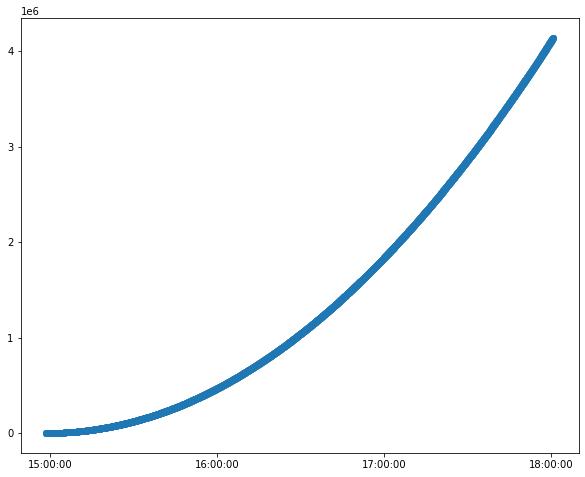

In [91]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(dates,ty**2)
ax.xaxis.set_major_locator(date.HourLocator())
ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
#ax.fmt_xdata = date.DateFormatter('%H:%M:%S')